In [1]:
import bnpy
import numpy as np
import util

In [2]:
alloc_model = 'FiniteHMM'
obs_model = 'Gauss'
learn_alg = 'VB'
K = 25

kwargs = {'ECovMat': 'covdata', #'diagcovdata',
          'sF': 0.5,
          'nu': 21,
          'MMat': 'zero',
          'hmmKappa': 100}

meeting_ids = [11] #[11, 16, 21]
out_paths = ['experiments/tmp' for meeting_id in meeting_ids]
dataset_titles = ['Meeting %d' % meeting_id for meeting_id in meeting_ids]

# Load data

In [4]:
datasets = [util.load_speaker_data(i) for i in meeting_ids]

# Run experiments

In [5]:
experiments = []
for meeting_id, dataset, out_path in zip(meeting_ids, datasets, out_paths):
    experiment_out = util.run_experiment(dataset, alloc_model, obs_model, learn_alg, K, out_path, **kwargs)
    experiments.append(experiment_out)

Training dense model
Dataset Summary:
Pre-processed audio data from NIST file LDC_20011116-1400.mat (meeting 11 / 21)
  size: 1 units (documents)
  dimension: 19
Allocation Model:  None
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [ 0.  0.]  ...
  E[ covar[k] ] = 
  [[ 11.34300136  -5.90605966]
   [ -5.90605966  15.70292204]] ...
Initialization:
  initname = randexamples
  K = 25 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/5 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: experiments/tmp/dense/1
        1/500 after      0 sec. |     96.8 MiB | K   25 | loss  2.926640640e+00 |  
        2/500 after      0 sec. |    105.3 MiB | K   25 | loss  2.869545411e+00 | Ndiff   40.638 
       25/500 after      3 sec. |    105.2 MiB | K   25 | loss  2.743207685e+00 | Ndiff    4.350 
       50/500 after      7 sec. |    105.3 MiB | K   25 | loss  2

      148/500 after     33 sec. |    130.0 MiB | K   25 | loss  2.706572252e+00 | Ndiff    0.000 
... done. converged.
Training O(L^2) model L = 2
Learn Alg: VB | task  3/1 | alg. seed: 6168832 | data order seed: 7360256
task_output_path: experiments/tmp/OL2-L=2/3
        1/500 after      0 sec. |    130.5 MiB | K   25 | loss  2.907749149e+00 |  
        2/500 after      0 sec. |    140.7 MiB | K   25 | loss  2.860668244e+00 | Ndiff   41.778 
       25/500 after      6 sec. |    140.8 MiB | K   25 | loss  2.727420909e+00 | Ndiff    8.858 
       50/500 after     11 sec. |    140.8 MiB | K   25 | loss  2.709962292e+00 | Ndiff    0.662 
       75/500 after     16 sec. |    140.8 MiB | K   25 | loss  2.708741950e+00 | Ndiff    0.164 
      100/500 after     22 sec. |    140.8 MiB | K   25 | loss  2.708253270e+00 | Ndiff    0.345 
      125/500 after     27 sec. |    140.8 MiB | K   25 | loss  2.708252324e+00 | Ndiff    0.000 
      131/500 after     28 sec. |    140.8 MiB | K   25 | loss 

task_output_path: experiments/tmp/sparse-L=5/3
        1/500 after      0 sec. |    215.4 MiB | K   25 | loss  2.907909757e+00 |  
        2/500 after      0 sec. |    224.8 MiB | K   25 | loss  2.857237596e+00 | Ndiff   48.149 
       25/500 after      6 sec. |    224.8 MiB | K   25 | loss  2.717477510e+00 | Ndiff    6.641 
       50/500 after     12 sec. |    224.8 MiB | K   25 | loss  2.711235032e+00 | Ndiff    0.116 
       75/500 after     18 sec. |    224.8 MiB | K   25 | loss  2.710170161e+00 | Ndiff    0.251 
      100/500 after     24 sec. |    224.8 MiB | K   25 | loss  2.709877920e+00 | Ndiff    0.011 
      125/500 after     30 sec. |    224.9 MiB | K   25 | loss  2.709877913e+00 | Ndiff    0.001 
      150/500 after     36 sec. |    224.9 MiB | K   25 | loss  2.709877913e+00 | Ndiff    0.000 
      175/500 after     42 sec. |    224.9 MiB | K   25 | loss  2.709877913e+00 | Ndiff    0.000 
      200/500 after     48 sec. |    224.9 MiB | K   25 | loss  2.709877913e+00 | Ndi

# Plot results

In [7]:
# Load results if necessary
try:
    experiments
except NameError:
    experiments = [util.load_experiment(out_path) for out_path in out_paths]

meeting_key = {meeting_id: i for i, meeting_id in enumerate(meeting_ids)}
def plot_results(meeting_id, ymin_loss=None, ymax_loss=None, ymin_ham=None, ymax_ham=None):
    idx = meeting_key[meeting_id]
    experiment = experiments[idx]
    title = dataset_titles[idx]
    
    util.plot_loss(experiment, title, ymin=ymin_loss, ymax=ymax_loss)
    util.plot_hamming(experiment, title, ymin=ymin_ham, ymax=ymax_ham)

## Meeting 11

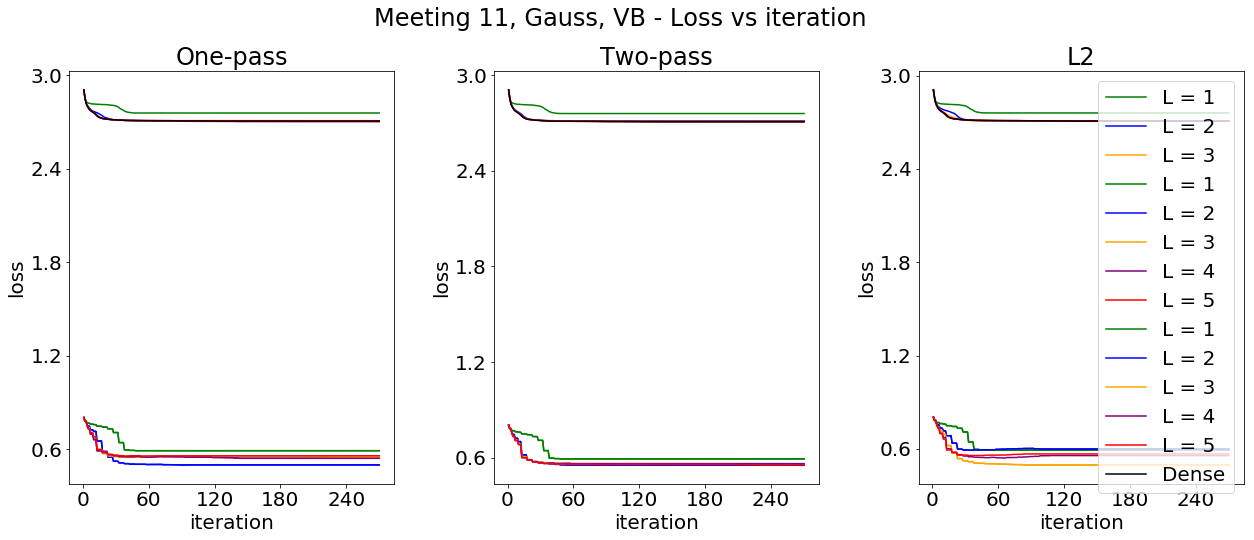

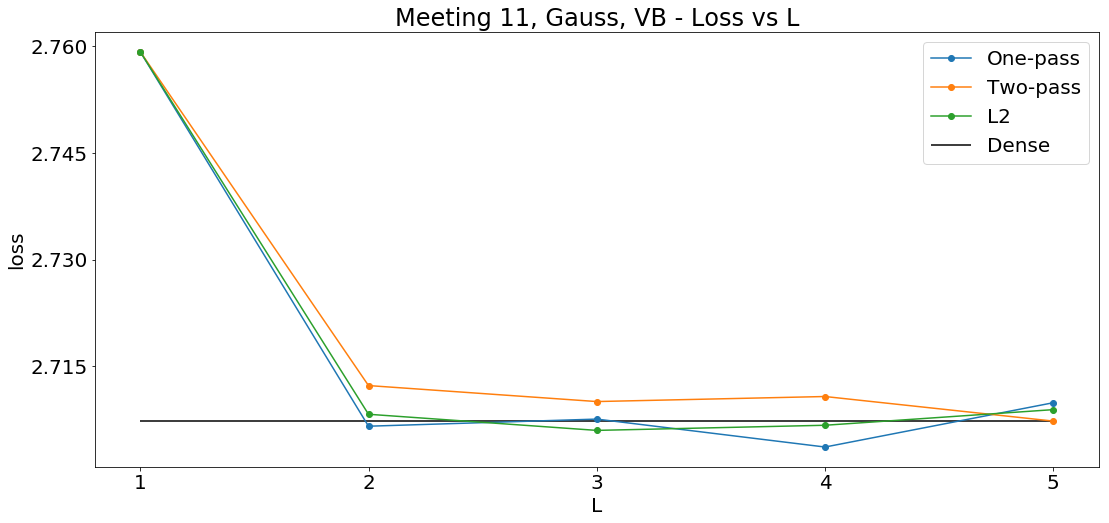

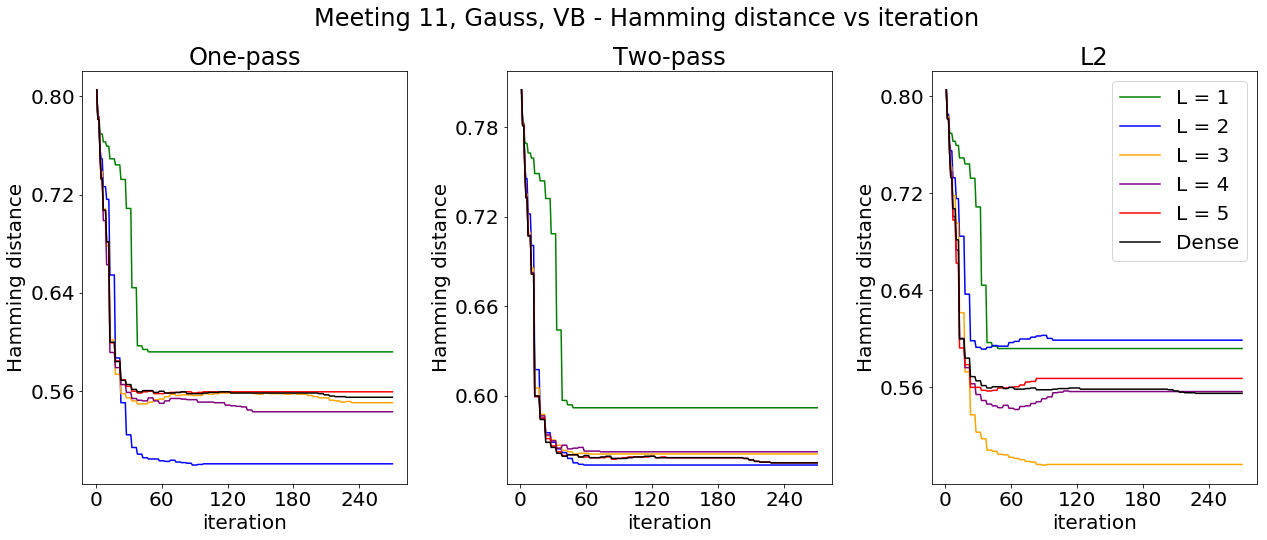

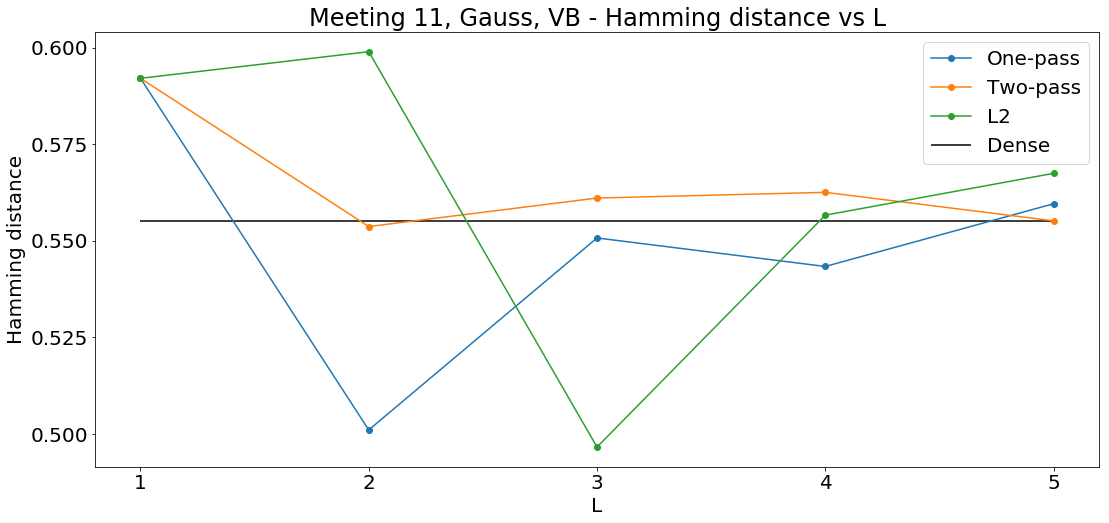

In [16]:
plot_results(11) #, ymax_loss=2.7, ymax_ham=0.75

In [12]:
type(experiments)

list

In [15]:
util.plot_hamming(experiments[0], dataset_titles[0], ymin=ymin_ham, ymax=ymax_ham)

NameError: name 'ymin_ham' is not defined

## Meeting 16

In [ ]:
plot_results(16)

## Meeting 21

In [ ]:
plot_results(21)